# CAB420, Dimension Reduction, Example 1: Principal Component Analysis (PCA)
Dr Simon Denman (s.denman@qut.edu.au)

## Overview
We'll explore PCA using some simple 2D data that we create. This will allow us to see how PCA operates.

## Too Long; Didn't Read
The main take home points from this example are:
* Principal component analysis (PCA) find a new set of dimensions into which we reproject the data. This can be seen as rotating the data around the current axes.
* The new dimensions are oriented such that the first one captures the most possible variation, the second one captures the second most variation, etc
* The new axis are orthogonal to each other (i.e. at right angles), just like our regular x/y/z axes
* We get back as many principal components as we have original dimensions (i.e. we don't have to reduce the dimensions)
* We can project points into and out of our PCA space, reprojecting back out will give us our original data back
* PCA will subtract the mean from the data when computing the new set of axes. If we pass is non-centred data, PCA will remove the mean for us (and return it), otherwise we can do this before we pass it in.

In [1]:
import numpy.random
import math
from sklearn import decomposition

import matplotlib.pyplot as plt

## Making Up Data
Our data will be two 25 length vectors (X and Y) which we'll rotate about the axes.

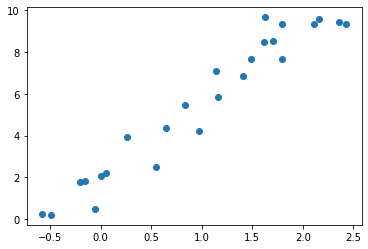

In [2]:
numpy.random.seed(4)
x = numpy.random.uniform(size=25)
y = numpy.random.uniform(size=25)


R = numpy.array([[math.cos(math.radians(75)), -math.sin(math.radians(75))], [math.sin(math.radians(75)), math.cos(math.radians(75))] ])
data = R.dot(numpy.array([x*10,y])).transpose()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:,0], data[:,1]);

## PCA
Let's get straight to it and apply PCA

In [3]:
pca = decomposition.PCA()
pca.fit(data)

PCA()

This fits a PCA transform to the set of data.

In terms of getting transformed points, we can now use the PCA transform we've learned do that as follows:

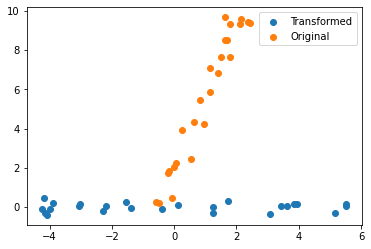

In [4]:
transformed_data = pca.transform(data)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(transformed_data[:,0], transformed_data[:,1], label='Transformed');
ax.scatter(data[:,0], data[:,1], label='Original');
ax.legend();

Note that our points have moved, but have the same shape.

We can also get a lot of details information our of model as follows:

In [5]:
# the learned components, also known as our eigenvectors
print(pca.components_)

# the explained variance of each component, also knowns as the eigenvalues
print(pca.explained_variance_)

# the percetnage of variance explained by each new dimension
print(pca.explained_variance_ratio_)

# The mean of the input data on which the transform was computed
print(pca.mean_)

[[-0.26015679 -0.96556638]
 [-0.96556638  0.26015679]]
[12.143596    0.04994728]
[0.99590379 0.00409621]
[0.98487167 5.52443813]


This gives us access to all the nuts and bolts of the method, and is helpful in understanding what's happening when things go wrong, as we'll see in later examples.

Let's project the transformed data back into the original space now

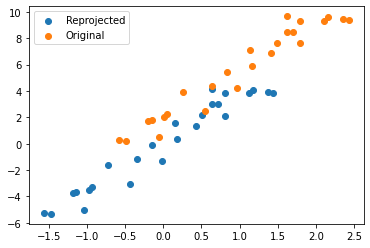

In [6]:
reprojected_data = transformed_data.dot(pca.components_)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(reprojected_data[:,0], reprojected_data[:,1], label='Reprojected');
ax.scatter(data[:,0], data[:,1], label='Original');
ax.legend();

Note that what we get back has the same shape and orientation but has been shifted such that it's centred. 

PCA operates over a centred version of the data, i.e. all dimensions have a mean of 0. This means that when we reproject back, we need to add the mean of of the orginal data.

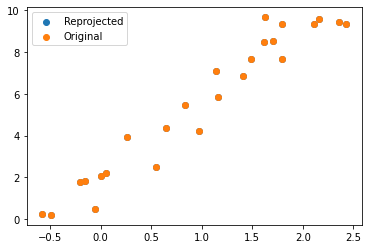

In [7]:
reprojected_data = transformed_data.dot(pca.components_) + pca.mean_
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(reprojected_data[:,0], reprojected_data[:,1], label='Reprojected');
ax.scatter(data[:,0], data[:,1], label='Original');
ax.legend();

Now we can see that our points totally overlap, i.e. we've recovered the original data.

In practice, there may be a very small difference between the two sets of values. This will be some tiny fraction (i.e. $10^{-15}$ or something) is just due to floating point errors.

## Further Exploration
Let's explore this a bit more. There are a few things that are worth pointing out.

First up, let's have a look at our rotation matrix that we used to compute our data, and our Eigenvectors.

In [8]:
print(R)
print(pca.components_)

[[ 0.25881905 -0.96592583]
 [ 0.96592583  0.25881905]]
[[-0.26015679 -0.96556638]
 [-0.96556638  0.26015679]]


These look quite similar, in values and in how they are aranged. What does this mean? Put simply, PCA is rotating our data. It's computing a rotation such that the maximum variance is now on the X-axis, the second most variance is on the Y-axis, and (if we have more than 2D data) so on. 

PCA doesn't fundamentally change the data, rather it just rotates the data to give us a new set of axis so we can identify where the most variance is. If we change R and run this again we can see what happens.

[[ 0.90630779 -0.42261826]
 [ 0.42261826  0.90630779]]
[[-0.90689233 -0.42136244]
 [-0.42136244  0.90689233]]


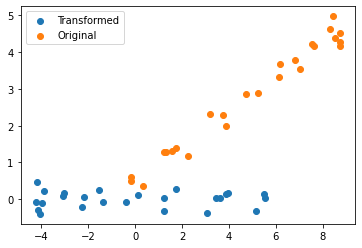

In [9]:
R = numpy.array([[math.cos(math.radians(25)), -math.sin(math.radians(25))], [math.sin(math.radians(25)), math.cos(math.radians(25))] ])
data = R.dot(numpy.array([x*10,y])).transpose()
pca = decomposition.PCA()
pca.fit(data)
transformed_data = pca.transform(data)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(transformed_data[:,0], transformed_data[:,1], label='Transformed');
ax.scatter(data[:,0], data[:,1], label='Original');
ax.legend()
print(R)
print(pca.components_)

This time we rotate our data by 25 degrees. We see that our rotation matrix has changed to reflect this, and the Eigenvalues from PCA have also changed.

Let's now have a look at this exlpained variance and fiddle with that. We saw before that when we had most of the variance in our x-axis, we had a much greater variance in our first component than we did in our second. Let's now make both dimensions more equal.

[0.12147497 0.04993124]
[0.70869645 0.29130355]


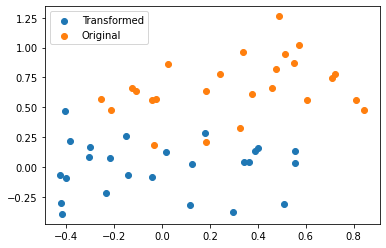

In [10]:
data = R.dot(numpy.array([x,y])).transpose()
pca = decomposition.PCA()
pca.fit(data)
transformed_data = pca.transform(data)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(transformed_data[:,0], transformed_data[:,1], label='Transformed');
ax.scatter(data[:,0], data[:,1], label='Original');
ax.legend()
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

We see now that the explained variance in the two dimensions is fairly similar - i.e. they are both roughly equal.

If we go the other way, and now scale the x-dimension by a lot, we get this.

[1.21435730e+03 4.99473739e-02]
[9.99958871e-01 4.11290149e-05]


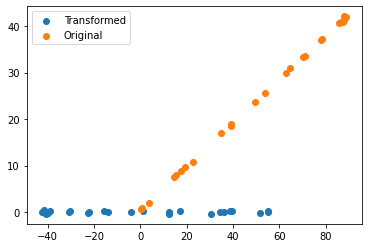

In [11]:
data = R.dot(numpy.array([x*100,y])).transpose()
pca = decomposition.PCA()
pca.fit(data)
transformed_data = pca.transform(data)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(transformed_data[:,0], transformed_data[:,1], label='Transformed');
ax.scatter(data[:,0], data[:,1], label='Original');
ax.legend()
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

And we see that our first component now contains far more variance than our second, and our second eigenvector is rather unimportant.

What this means is that 99.9% of the variance in the data is captured in that first eigenvector, i.e. if we were to work only in a single dimension, we'd lose almost nothing in terms of the amount of explained variance.

One important thing to note here is that this doesn't mean that the second dimension is not useful here. Depending on our task, that second dimension may actually be very important, but in other situations it may actually be junk. It all depends on what we're trying to achieve.

One final thing we'll explore briefly is the distance between points. Let's take two points, and get the Euclidean distance between them. We'll do this for the same pair of points in the original data space and the PCA data space. 

In [12]:
print('Original Points:    (%f, %f), (%f, %f)' % (data[1,0], data[1,1], data[4,0], data[4,1]))
print('  Distance Between:  %f' % numpy.sqrt(numpy.sum(numpy.power(data[1,:] - data[4,:], 2))))
print('Transformed Points: (%f, %f), (%f, %f)' % (transformed_data[1,0], transformed_data[1,1], transformed_data[4,0], transformed_data[4,1]))
print('  Distance Between:  %f' % numpy.sqrt(numpy.sum(numpy.power(transformed_data[1,:] - transformed_data[4,:], 2))))

Original Points:    (49.342200, 23.671492), (63.063091, 29.857470)
  Distance Between:  15.050886
Transformed Points: (1.187802, 0.122062), (-13.861882, -0.068161)
  Distance Between:  15.050886


Our two pairs of points have very different values, yet the distance between them in unchanged.

PCA does not move points relative to one another, it moves the entire set of points. But the distance between any pair of points is only unchanged provided you retain all dimensions. As we drop dimensions, this distance will change as information is lost.